# LFW

In [1]:
from pytorch_grad_cam import GradCAM
import torch
from model.iresnet import iresnet18

DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/weights/baseline-finetune.pth"
model = iresnet18()
checkpoint = torch.load(DIR)
model.load_state_dict(checkpoint)
target_layers = [model.layer4[-1]]
print(target_layers)

[IBasicBlock(
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu): PReLU(num_parameters=512)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)]


In [2]:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

In [3]:
import os
from torchvision.datasets import ImageFolder
from dataset import Transforms
DATA_DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data"
test_dir = os.path.join(DATA_DIR,"lfw")
test_dataset = ImageFolder(test_dir, transform=Transforms.testlfw)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


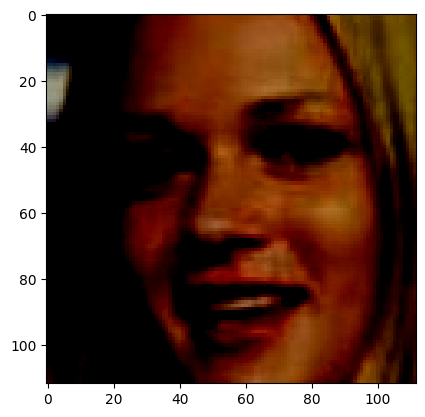

In [4]:
import matplotlib.pyplot as plt

plt.imshow(test_dataset[0][0].permute(1,2,0))
plt.show()

In [5]:
cam_result = cam(test_dataset[0][0].unsqueeze(0))

(1, 112, 112)
(112, 112)
0.9999999


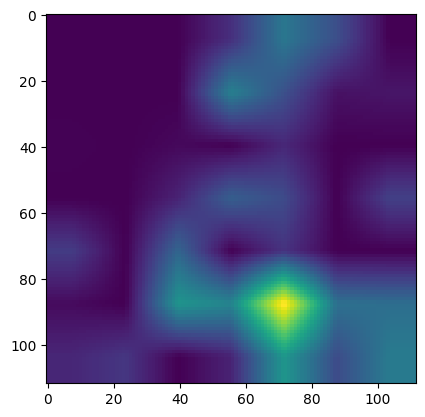

In [28]:
print(cam_result.shape)
print(cam_result.reshape(112,112).shape)
plt.imshow(cam_result.reshape(112,112))
print(cam_result.max())

(112, 112, 3)


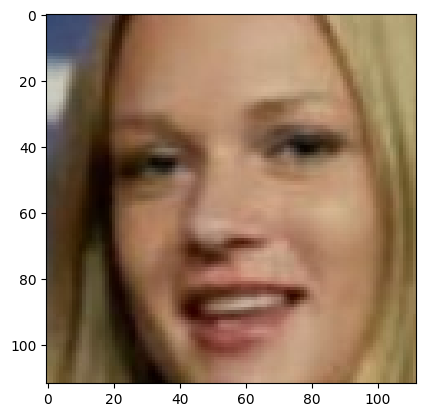

In [26]:
import os
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision import transforms
DATA_DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data"
test_dir = os.path.join(DATA_DIR,"lfw")
test_dataset01 = ImageFolder(test_dir, transform=transforms.Compose([transforms.CenterCrop(112)]))
img = np.array(test_dataset01[0][0])
# img = Image.fromarray(test_dataset01[0][0])
plt.imshow(img)
print(img.shape)

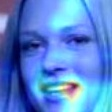

In [39]:
import cv2
from PIL import Image
heatmap = np.uint8(255*cam_result.reshape(112,112))
# print(heatmap.shape)
# print(heatmap.max())
# print(heatmap.min())
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite("./map.jpg", superimposed_img)
Image.open("./map.jpg").show()

# ======================================

# FMDG

In [48]:
from pytorch_grad_cam import GradCAM
import torch
from model.iresnet import iresnet18

DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/weights/baseline-finetune.pth"
model = iresnet18()
checkpoint = torch.load(DIR)
model.load_state_dict(checkpoint)
target_layers = [model.layer4[-1]]
print(target_layers)
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=True)

[IBasicBlock(
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (prelu): PReLU(num_parameters=512)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)]


In [49]:
import os
from torchvision.datasets import ImageFolder
from dataset import Transforms
from torchvision import transforms

normalize = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
transfmdg = transforms.Compose([
    transforms.Resize((140,140)),
    transforms.CenterCrop(112),
    transforms.ToTensor(),
    transforms.Normalize(*normalize)
])
DATA_DIR = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/train-and-experiment/data"
test_dir_fmdg = os.path.join(DATA_DIR,"FMDG")
test_dataset_fmdg = ImageFolder(test_dir_fmdg, transform=transfmdg)

In [50]:
print(len(test_dataset_fmdg))
print(test_dataset_fmdg[0][0].shape)

20000
torch.Size([3, 112, 112])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 112, 112])


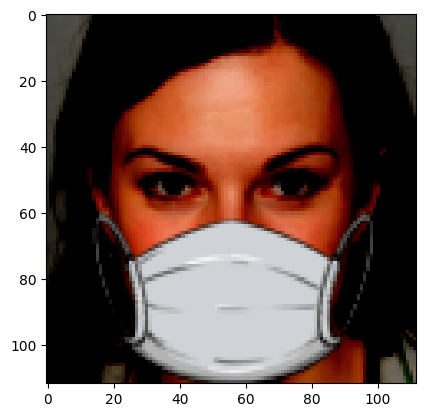

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


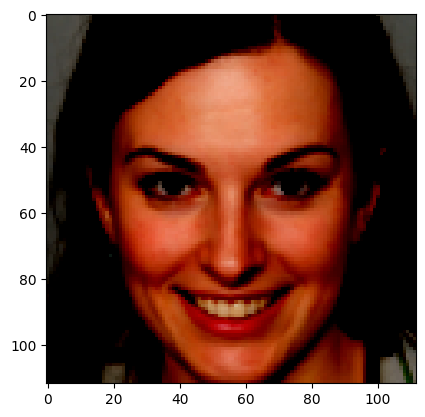

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


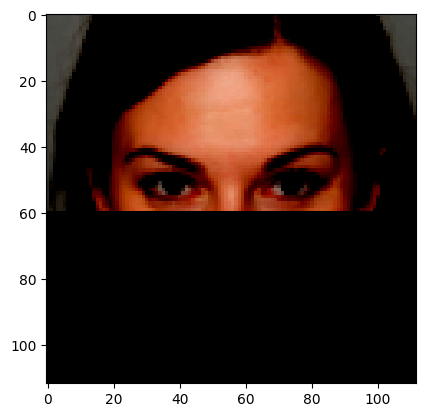

In [63]:
from dataset import cutout_mask
import matplotlib.pyplot as plt
import random 
ID = random.randint(0,9999)
img_list = []
img_list.append(test_dataset_fmdg[ID][0])
img_list.append(test_dataset_fmdg[ID+10000][0])
img_list.append(cutout_mask(test_dataset_fmdg[ID+10000][0].unsqueeze(0),p=1.0).squeeze(0))
print(img_list[0].shape)

for single_im in img_list:
    plt.imshow(single_im.permute(1,2,0))
    plt.show()

In [67]:
print(ID)

2017


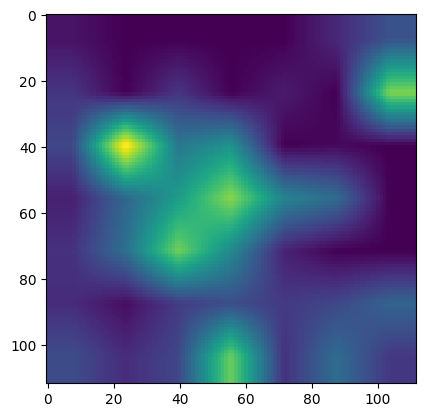

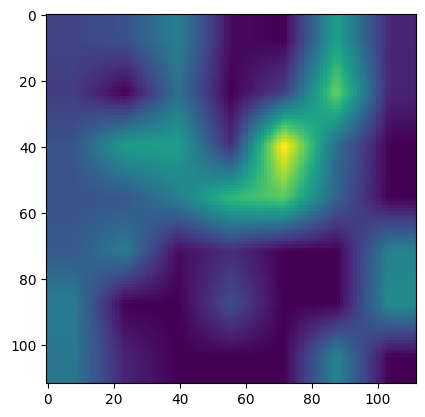

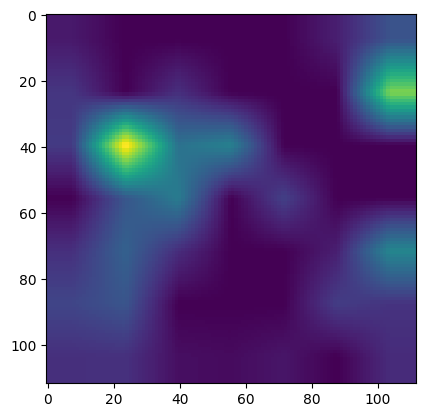

In [64]:
heatmap_list = []
for input in img_list:
    heatmap = cam(input.unsqueeze(0))
    heatmap_list.append(heatmap.squeeze(0))
    plt.imshow(heatmap.reshape(112,112))
    plt.show()

In [78]:
print(int(1024*0.8))
print(int(1024*0.5))

819
512


(819, 819, 3)


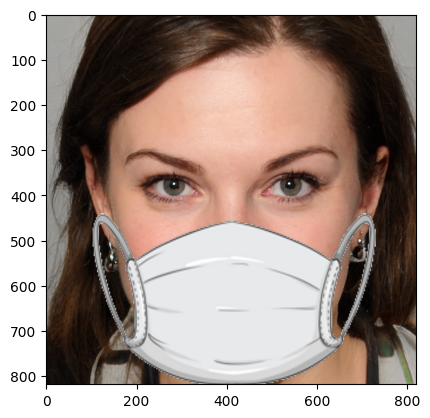

(819, 819, 3)


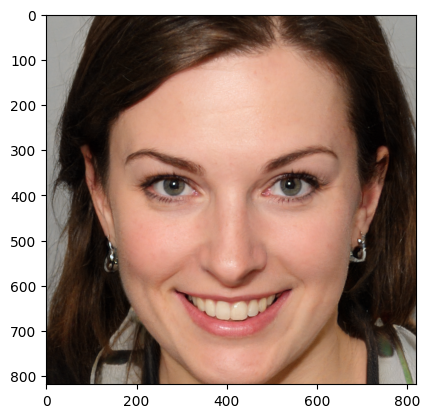

(819, 819, 3)


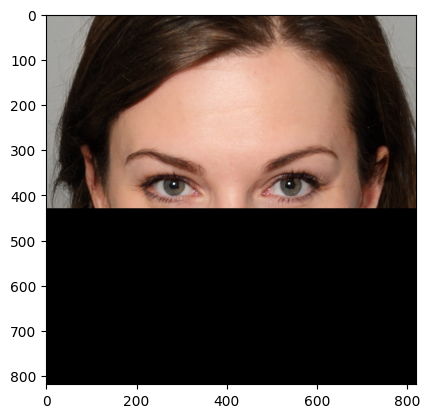

In [81]:
import numpy as np
transfmdg01 = transforms.Compose([
    # transforms.Resize((140,140)),
    # transforms.CenterCrop(112),
    transforms.CenterCrop(int(1024*0.8))
])
test_dataset_fmdg01 = ImageFolder(test_dir_fmdg, transform=transfmdg01)
# test_dataset_fmdg01 = ImageFolder(test_dir_fmdg)
img_list01 = []
img_list01.append(np.array(test_dataset_fmdg01[ID][0]))
img_list01.append(np.array(test_dataset_fmdg01[ID+10000][0]))
temp = np.array(test_dataset_fmdg01[ID+10000][0])
temp[int(1024*0.42):,:,] = 0
img_list01.append(np.array(temp))

for im in img_list01:
    print(im.shape)
    plt.imshow(im)
    plt.show()

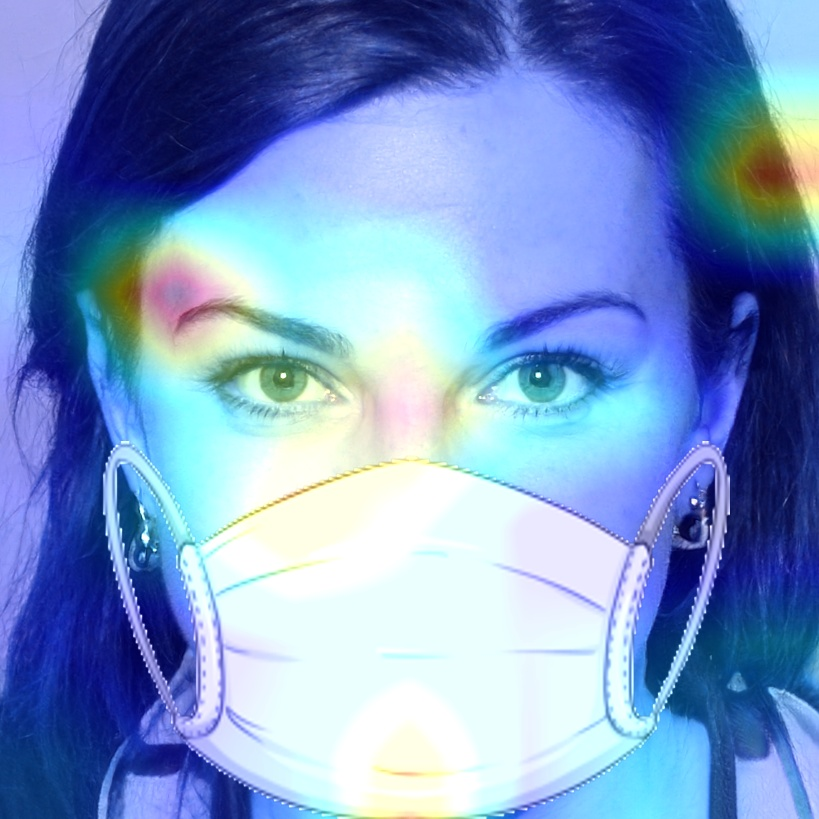

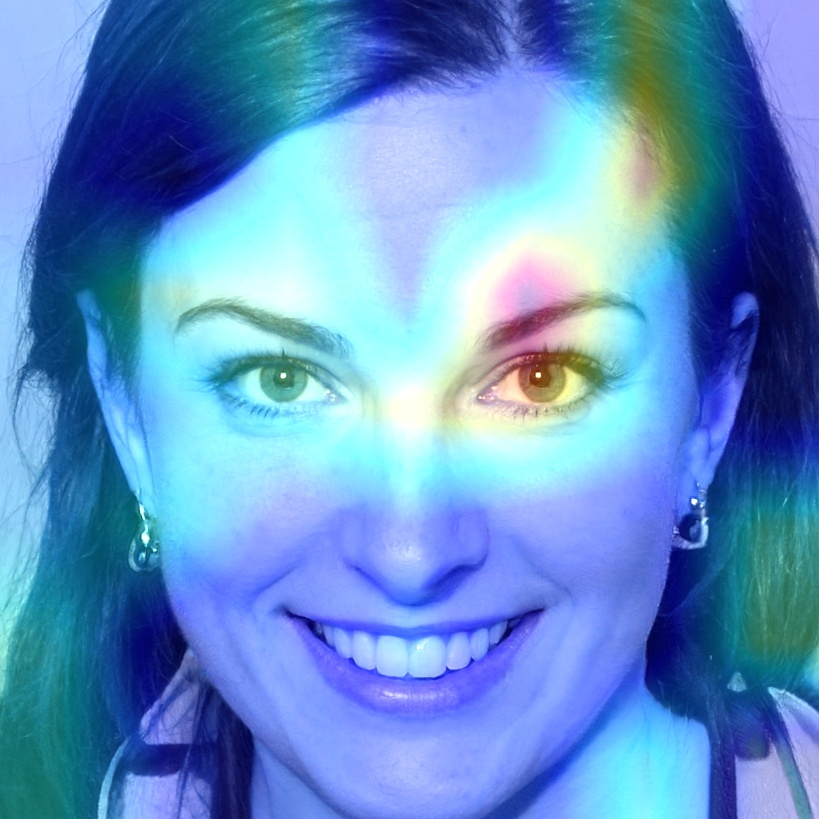

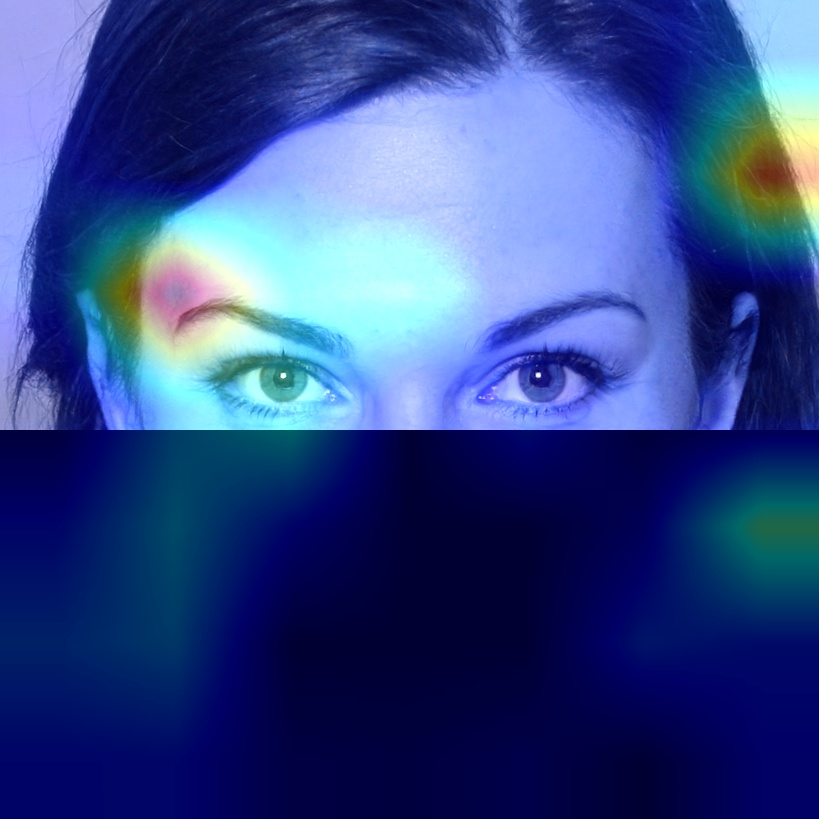

In [82]:
import cv2
from PIL import Image
for i, heatmap in enumerate(heatmap_list):
    heatmap = np.uint8(255*heatmap.reshape(112,112))
    heatmap = cv2.resize(heatmap, (img_list01[0].shape[1],img_list01[0].shape[0]))
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    # if i==1:
    #     superimposed_img = heatmap * 0.4 + img_list01[1]
    # else:
    superimposed_img = heatmap * 0.4 + img_list01[i]
    cv2.imwrite(f"./map{i}.jpg", superimposed_img)
    Image.open(f"./map{i}.jpg").show()